# Sports races data gathering and data analysis

Who hasn't been completely astonished when seeing a Formula 1 or MotoGP race? It is not even necessary to actually see them racing, those aerodynamic designs would take the breath away to anyone seeing them for the first time. Therefore, we decided to endeepen in the history of these 2 relatively recent sports and get to know a little bit more about both of them.

The purpose of these project was to create a complete datapipeline, making a whole process from data gathering to data visualisation. Our goal was to use two different data sources, we choose a public [API for formula one](http://ergast.com/mrd/) and for the MotoGP data we went to the[official website](https://www.motogp.com/) and scrapped most of the available information.

## _Data Gathering_

### Formula 1

There have been many ups and downs during the data gathering process for the Formula 1. Luckly, the API had a clear documentation, which made the whole process much easier. The most bothering part was the way the information was received since it was extremely nested as you can see in the image below.

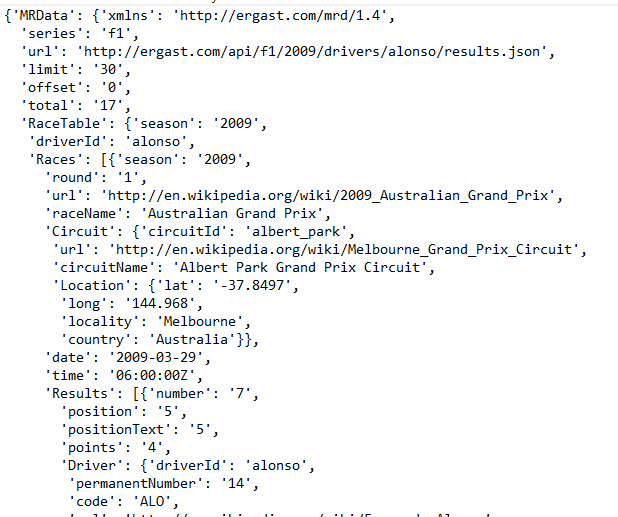

This is the data we received about each race. Therefore, we had different problems to tackle. First of all, we didn't want to have repeated all the info about a constructor, circuit or driver. Therefore, we created 3 different tables containing all their related information. Now, we only needed to receive the race related information and the 3 different IDs.
The API was able to return all the races a driver had runned during a year. We could also gather all the driver IDs per year, and all the years that were available in the API. We had all the needed pieces of the puzzle, we just needed to place them in the right place.
Therefore, we created a function that would return a dictionary, being the key the year (season) and the value, all the drivers ID. We only had to loop through the years, through each driver and once we received all the races for that driver in that specific year, we could loop through them and get all the information we wanted.

In [1]:
#This is just to better show the way the function worked, do not try to run it.
def all_races(from_year, to_year):
    
    driver_race = {}
    total_races = []
    result_fields = ['position', 'points', 'laps']
    
    for y in season_drivers(from_year,to_year).keys():       
        for driver in season_drivers(y, y+1)[y]:
            driver_req = requests.get(site+str(y)+'/drivers/'+driver['driverId']+'/results.json').json()['MRData']['RaceTable']['Races']
            driver_race[driver['driverId']] = driver_req
            for race in driver_race[driver['driverId']]:
                current_race = ([driver['driverId'], 
                                y,
                                race['round'],
                                race['Circuit']['circuitId'],
                                race['Results'][0]['Constructor']['constructorId'],
                                race['Results'][0]['status'],
                                ] + 
                                [race['Results'][0][field] for field in result_fields])
                if 'Time' in race['Results'][0] :
                    current_race = current_race + [race['Results'][0]['Time']['time']]
                else:
                    current_race = current_race + ['NaN']
                if 'FastestLap' in race['Results'][0]:
                    current_race = (current_race + 
                    [race['Results'][0]['FastestLap']['Time']['time'],
                    race['Results'][0]['FastestLap']['lap'],
                    race['Results'][0]['FastestLap']['rank'],
                    race['Results'][0]['FastestLap']['AverageSpeed']['speed']])
                else:
                    current_race = (current_race + ['NaN','NaN','NaN','NaN'])
                total_races.append(current_race)
    return total_races

The loops were the easy part. Now we had to face how to choose every piece of information from each race and to some error handling, since many races lacked information related to the fastest lap results and some of the races about the total time per driver. In the previous block of code, it can be seen how we handle it, by checking if the information was available and if it wasn't adding NaN, in order to respect the data order.
Once we gathered all the information and put all the historical races data in a single dataset, we would save it in the csv_files directory to have everything well organised. Now we only had to start analysing the data!

### Moto GP

## Data Analysis

### Formula 1

Clearly, our first task was to clean the data and make it manageable. That is why we merged all the 4 tables , to make data analysis easier. We also changed the the name of the columns and put it in a nice visual order. Below, it can be seen how the data was organised and how many columns and rows we had available.

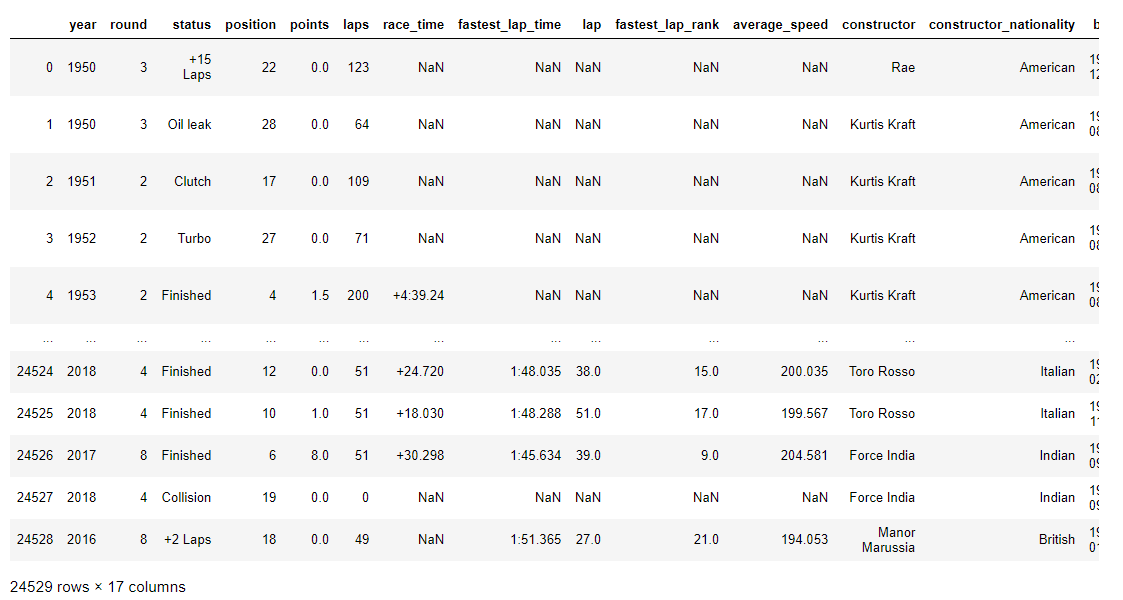

The first analysis we carried out was the most superficial one, answering basic question that are always interesting. Questions like:
 - Top 10 drivers with more points in history
 - Disqualifying reasons evolution over the years (picture below)
 - Drivers who have won more races
 - Top 10 most 1 positions by nationality
 - ...

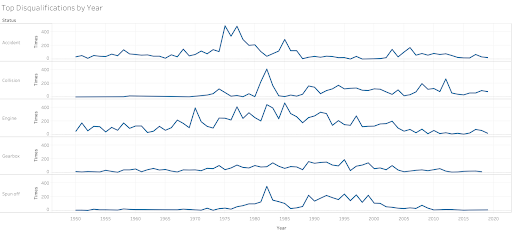

Once the main questions were answered, we wanted to make a more technical analysis. Therefore we tried to find the correlation between the finished race position and the finished fastests lap position. We had to make an scatter plot, but giving more importance to the number of times a combination was repeated, since most combination had passed more than once. The important value was how many times did each combination was repeated.
We were pretty happy with our final result.

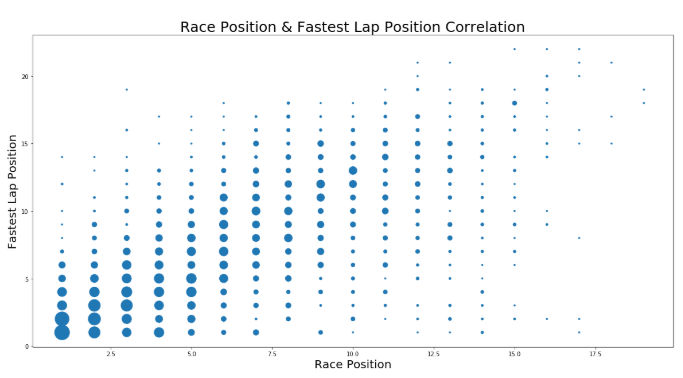

They had a correlation of 65%, which is pretty high and it clearly shows that they are highly related. Nevertheless, we expected it to have a higher relation since being the fastest show be highly related to being first. However, after giving it some thought,  it makes sense that it has a big correlation, but not as high as we would expect since many things can happen throughout the race (such as having a colision or a car problem). Moreover, consistency is more important than making just one perfect lap.

### Moto GP

## Conclusions

Añade aquí algunas conclusiones generales